In [2]:
import numpy as np
import h5py
import pandas as pd

In [3]:
a = np.random.rand(10)

In [4]:
print(a)

[ 0.10446342  0.50325284  0.45561325  0.76275713  0.00598862  0.59252841
  0.72711662  0.36442531  0.4814864   0.76956434]


In [6]:
# %store a 
# %store -r a

# store = pd.HDFStore('simple_scratch_store.h5')
# store['a'] = a

In [16]:
import numpy as np
import h5py

# Please download the file SCNeuronModelCompetition.mat from here.
# https://github.com/santacruzml/fall-17-scml-competition/releases/download/0.0-data/SCNeuronModelCompetition.mat

datafile = h5py.File('/Users/dclark/work/scml17-data/SCNeuronModelCompetition.mat')
movie = datafile.get('trainingmovie_mini') # movie for training
frhist = datafile.get('FRhist_tr') # firing rate histograms

# a little normalization for the movie (assuming that the movie is 3D array)
# def normalize(inputmovie):
#     movie_mean = np.mean(inputmovie, axis=(0, 1, 2))
#     movie_std = np.std(inputmovie, axis=(0, 1, 2))
#     return (inputmovie - movie_mean) / movie_std
# 
# movie_norm = normalize(movie)
# 
# movief = np.array(movie_norm[:,:,(16*128):(80*128)])
# movief = movief.reshape((288,150,64,128))
# movief = np.expand_dims(movief,axis=4)


movie_fl = np.array(movie[:,:,(16*128):(80*128)],dtype=np.uint8)
movie_fl = np.reshape(movie_fl,(288,150,64,128))

np.save('frhist.npy', frhist)

In [38]:
import keras
import numpy as np



base_model = keras.applications.mobilenet.MobileNet(input_shape=(128,128,3), alpha=.25, 
                                               depth_multiplier=1, include_top=False, 
                                               weights='imagenet', pooling=None)

base_model.summary()

model = keras.Model(inputs=base_model.input, outputs=base_model.get_layer('conv_dw_3_relu').output)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 8)         216       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 8)         32        
_________________________________________________________________
conv1_relu (Activation)      (None, 64, 64, 8)         0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 8)         72        
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 8)         32        
_________________________________________________________________
conv_dw_1_relu (Activation)  (None, 64, 64, 8)         0         
__________

In [39]:
from keras.applications.mobilenet import preprocess_input

In [118]:
# im = np.squeeze(movief[220,50,:,:])
# im = np.expand_dims(im, axis=0)
# im = preprocess_input(im)
# print(im.shape)
# print(im.max())
# print(im.min())

im2_raw = np.squeeze(np.reshape(movie[220,120,:],(96,128)))
print(im2.shape)
im2 = np.pad(im2_raw,((16,16),(0,0)), 'constant', constant_values=0)
im2 = np.expand_dims(im2, axis=2)
print(im2.shape)
im2 = np.tile(im2,(1,1,3))
print(im2.max())
print(im2.min())
print(im2.shape)
im2 = np.expand_dims(im2, axis=0)
im2 = preprocess_input(im2)
print(im2.max())
print(im2.min())
print(im2.shape)

(1, 128, 128, 3)
(128, 128, 1)
239.0
0.0
(128, 128, 3)
0.874509803922
-1.0
(1, 128, 128, 3)


In [145]:
out = model.predict(im2)

(1, 32, 32, 32)


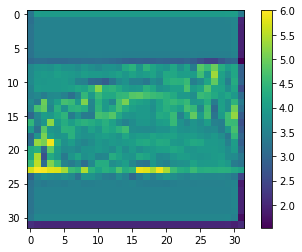

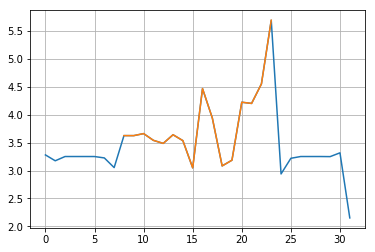

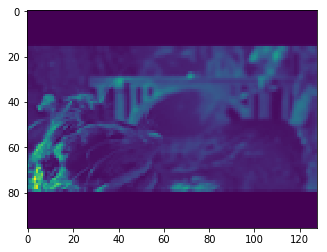

In [158]:
import matplotlib.pyplot as plt
%matplotlib inline

print(out.shape)
# print(np.squeeze(out[:,:,:,4]))
plt.figure()
plt.imshow(np.squeeze(out[:,:,:,30]))
plt.colorbar()
plt.figure()
plt.plot(np.squeeze(out[:,:,0,30]))
plt.plot(np.arange(8,24),np.squeeze(out[:,8:24,0,30]))
plt.grid()
plt.figure()
plt.imshow(im2_raw)

In [128]:
movie_mn = np.array(movie,dtype=np.uint8)
print(type(movie_mn))
print(movie_mn.dtype)
# movie_mn = np.reshape(movie,(288,150,96,128)).astype(np.uint8)
print()

<class 'numpy.ndarray'>
uint8



In [40]:
movie_mn = np.array(movie,dtype=np.uint8)
movie_mn = np.reshape(movie_mn,(288,150,96,128))
print(movie_mn.shape)
movie_mn = np.pad(movie_mn,((0,0),(0,0),(16,16),(0,0)), 'constant', constant_values=0)
print(movie_mn.shape)
movie_mn = np.expand_dims(movie_mn, axis=4)
print(movie_mn.shape)
movie_mn = np.tile(movie_mn,(1,1,1,1,3))
print(movie_mn.shape)

(288, 150, 96, 128)
(288, 150, 128, 128)
(288, 150, 128, 128, 1)
(288, 150, 128, 128, 3)


In [136]:
# tmp = preprocess_input(np.squeeze(movie_mn[0,:,:,:,:].astype(np.float32)))
# print(tmp.shape)

(150, 128, 128, 3)


In [143]:
a = model.predict(tmp)
a.shape

(150, 32, 32, 32)

In [1]:
import keras
import numpy as np

base_model = keras.applications.mobilenet.MobileNet(input_shape=(128,128,3), alpha=.25, 
                                               depth_multiplier=1, include_top=False, 
                                               weights='imagenet', pooling=None)
base_model.summary()

model = keras.Model(inputs=base_model.input, outputs=base_model.get_layer('conv_dw_3_relu').output)
model.summary()

mn_out = np.empty((288,150,16,32,32),dtype=np.float32)
for ii in range(288):
    tmp = preprocess_input(np.squeeze(movie_mn[ii,:,:,:,:].astype(np.float32)))
    tmp_out = model.predict(tmp)
    mn_out[ii,:,0:16,:,:] = tmp_out[:,8:24,:,:]
    print(ii,end=' ')

Using TensorFlow backend.
/Users/dclark/.virtualenvs/keras_tf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


 557056/2108140 [======>.......................] - ETA: 15s

KeyboardInterrupt: 

In [85]:
np.save('mn_out.npy',mn_out)
# print(mn_out.shape)

# mn_out = np.reshape(mn_out,(288,150,-1))
# print(mn_out.shape)

In [84]:
mn_out.shape

(288, 150, 16, 32, 32)

In [186]:
from keras.layers import LSTM, Activation, Dense, BatchNormalization

# It makes a 3-layer LSTM network with batch normalization on each layer.
# No dropout, regularization, convolution structures are used.
# As you see in the summary, most parameters go to the first weight matrix.



movie_chunk_length = mn_out.shape[1]
mn_out_length = mn_out.shape[2]
nHidden = 100
nLayer = 3
nSCNeu = frhist.shape[2]


modelr = keras.models.Sequential()
modelr.add(LSTM(nHidden, input_shape=(movie_chunk_length, mn_out_length), return_sequences=True, implementation=2))

for _ in range(nLayer-1):
    modelr.add(BatchNormalization(momentum=0))
    modelr.add(Activation('relu'))
    modelr.add(LSTM(nHidden, return_sequences=True))
    
modelr.add(BatchNormalization(momentum=0))
modelr.add(Activation('linear'))
modelr.add(Dense(nSCNeu))
modelr.add(Activation('softplus'))
adamopt = keras.optimizers.Adam(lr = 0.001, decay = 1e-7)

# Please make sure to use Poisson likelihood function for the loss function
modelr.compile(optimizer=adamopt, loss='poisson')
modelr.summary()

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = modelr.fit(mn_out, frhist, epochs=200, batch_size=32, validation_split=0.2, shuffle=True, callbacks=[early_stopping])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 150, 100)          6594000   
_________________________________________________________________
batch_normalization_17 (Batc (None, 150, 100)          400       
_________________________________________________________________
activation_29 (Activation)   (None, 150, 100)          0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 150, 100)          80400     
_________________________________________________________________
batch_normalization_18 (Batc (None, 150, 100)          400       
_________________________________________________________________
activation_30 (Activation)   (None, 150, 100)          0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 150, 100)          80400     
__________

In [175]:
%whos

Variable             Type             Data/Info
-----------------------------------------------
Activation           type             <class 'keras.layers.core.Activation'>
BatchNormalization   type             <class 'keras.layers.norm<...>tion.BatchNormalization'>
Dense                type             <class 'keras.layers.core.Dense'>
LSTM                 type             <class 'keras.layers.recurrent.LSTM'>
a                    ndarray          150x32x32x32: 4915200 elems, type `float32`, 19660800 bytes (18.75 Mb)
adamopt              Adam             <keras.optimizers.Adam object at 0x1dc6549b0>
base_model           Model            <keras.engine.training.Mo<...>el object at 0x1e05a3ef0>
datafile             File             <HDF5 file "SCNeuronModel<...>mpetition.mat" (mode r+)>
early_stopping       EarlyStopping    <keras.callbacks.EarlySto<...>ng object at 0x1dc797780>
frhist               Dataset          <HDF5 dataset "FRhist_tr"<...>88, 150, 54), type "<f8">
h5py            

In [181]:
16*32*32

16384

In [187]:
print(history.history.keys())

dict_keys(['val_loss', 'loss'])


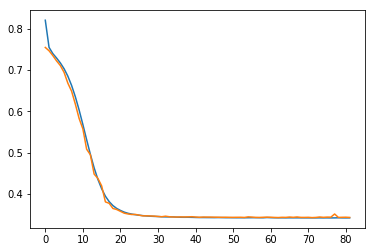

In [188]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

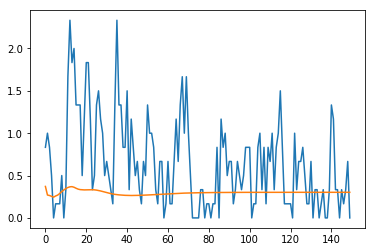

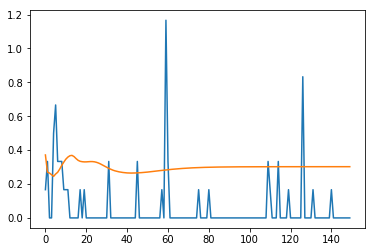

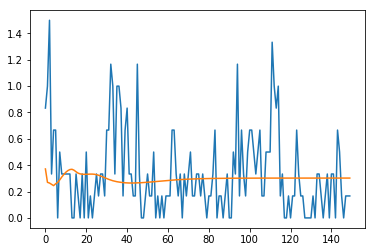

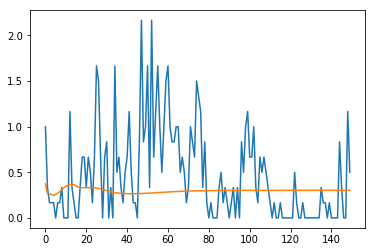

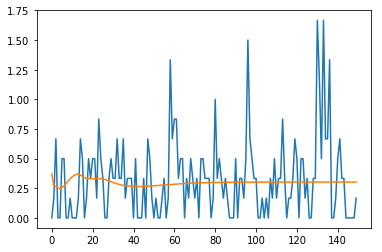

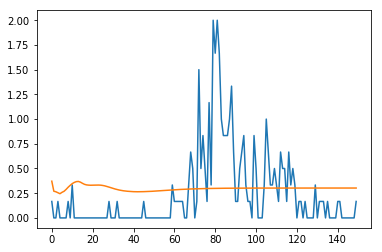

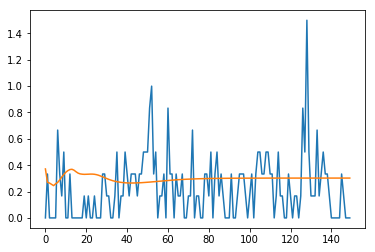

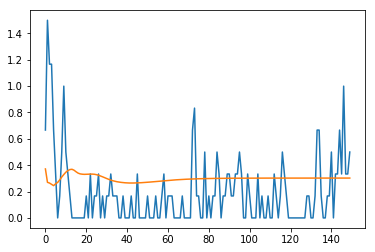

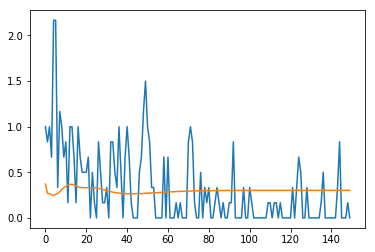

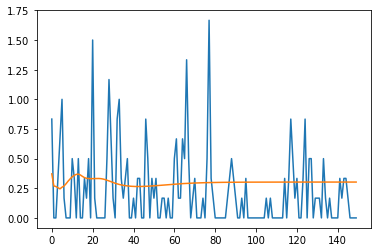

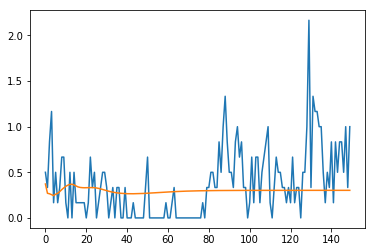

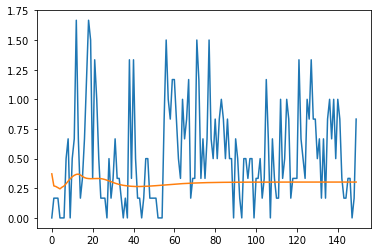

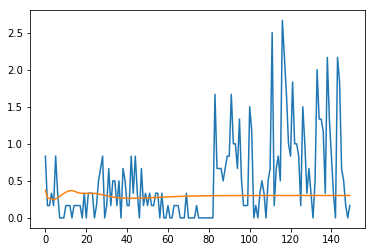

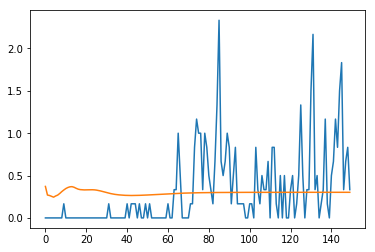

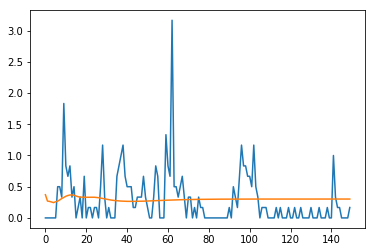

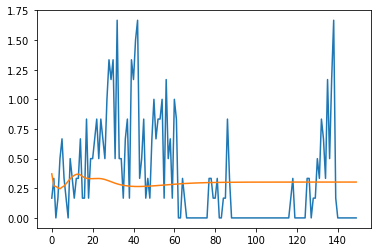

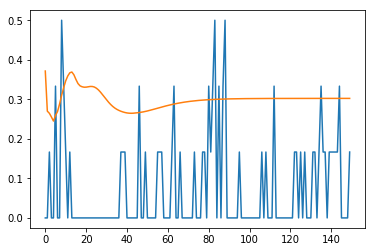

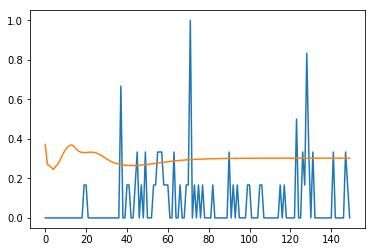

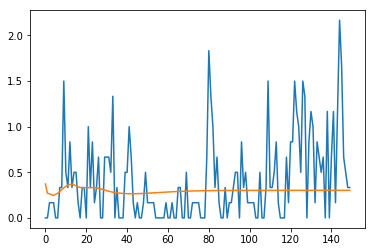

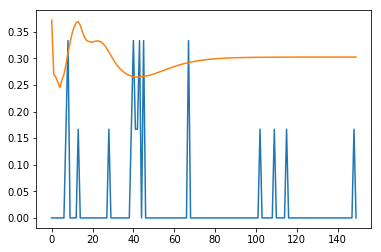

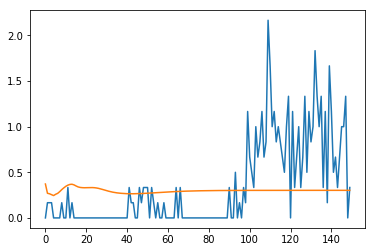

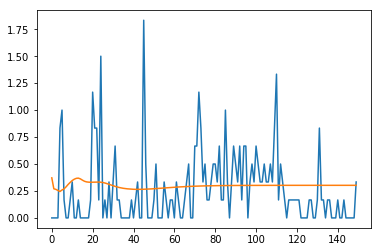

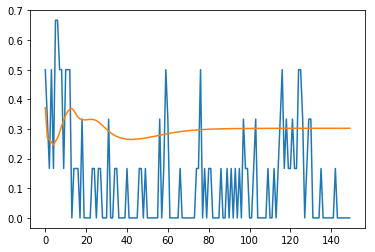

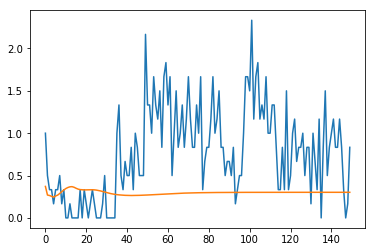

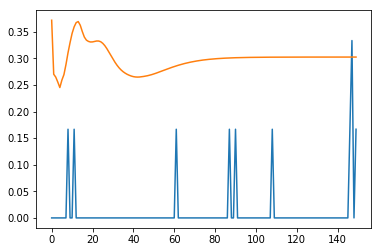

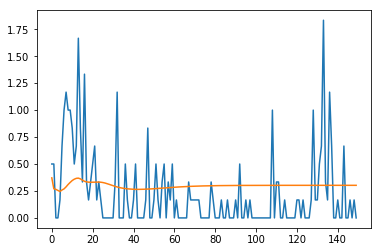

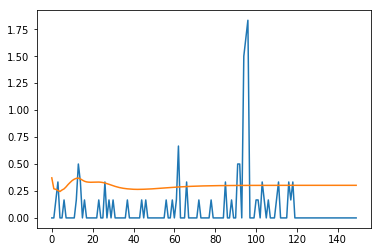

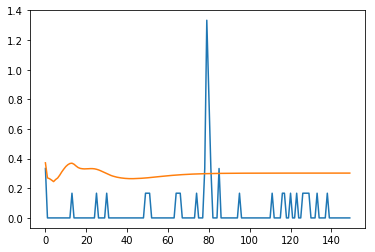

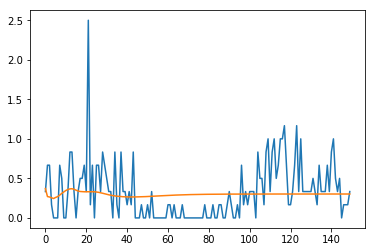

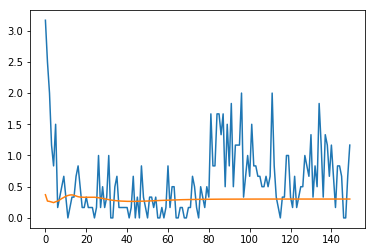

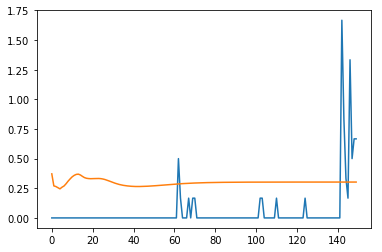

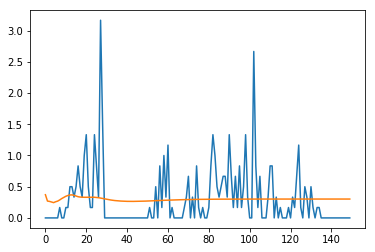

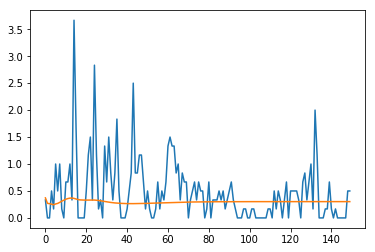

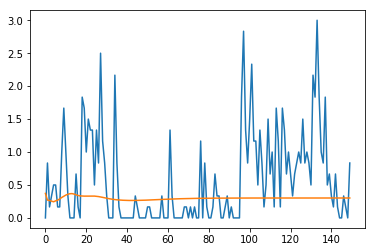

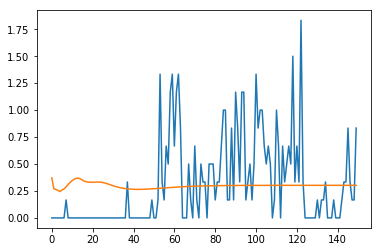

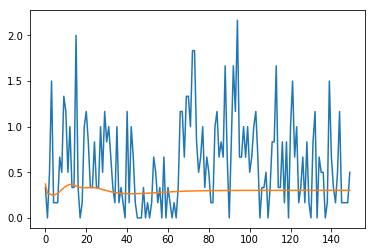

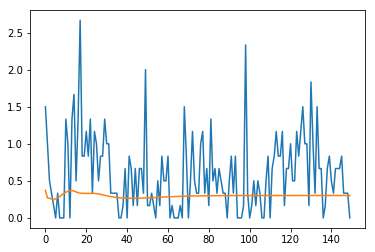

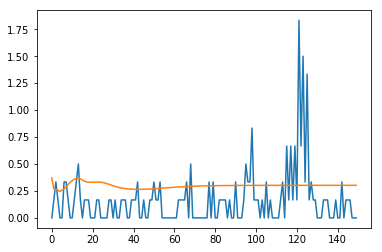

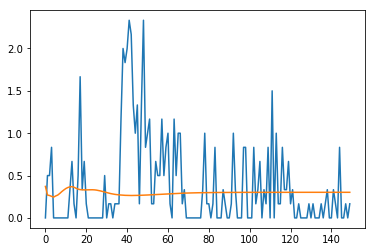

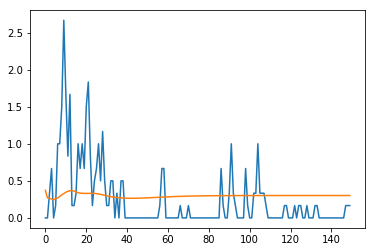

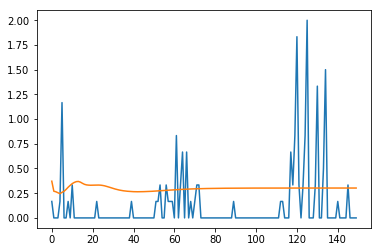

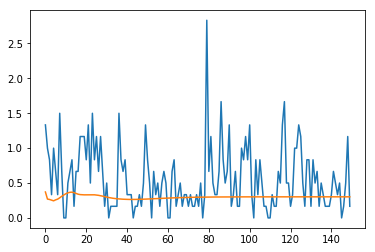

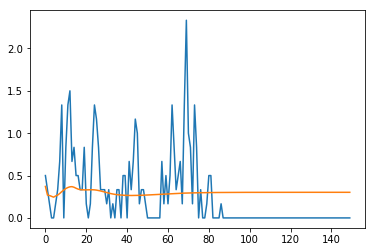

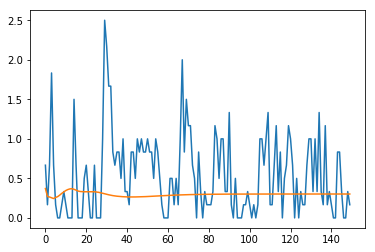

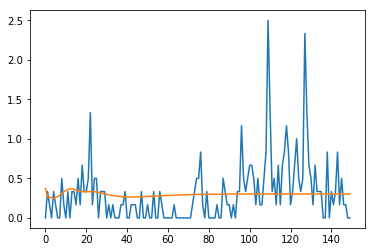

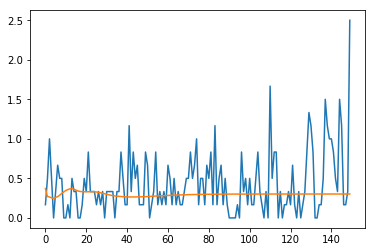

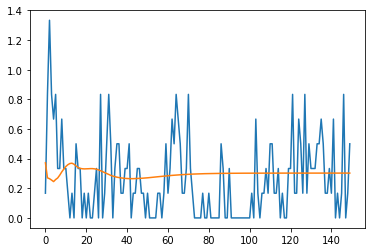

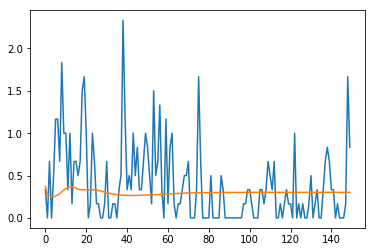

In [192]:
%matplotlib inline
import matplotlib.pyplot as plt

output = modelr.predict(mn_out)

for m in range(0, 48):
    n=31
    # plot the average of 6 trials of the same movie
    plt.plot(np.mean(frhist[(m*6):(m+1)*6, :, n], axis=(0)))
    
    # plot the output of the network
    plt.plot(output[m*6,:,n])
    plt.show()
    # last 10 movies should be the validation dataset

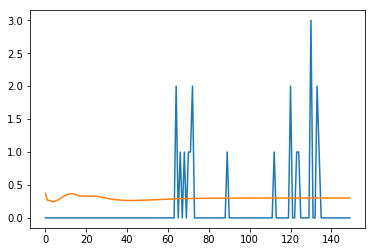

In [196]:
plt.figure()
plt.plot(frhist[242, :, n])
plt.plot(output[242,:,n])

In [197]:
modelr.save('mn_to_lstm.h5')

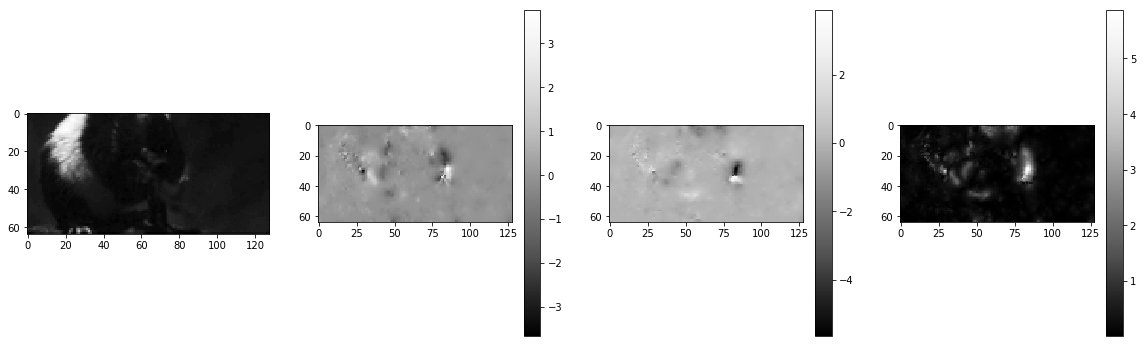

In [78]:
import pyoptflow as pof
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,6)

FILTER = 7


im1 = np.squeeze(movie_fl[230,125,:,:])
im2 = np.squeeze(movie_fl[230,126,:,:])
U,V = pof.HornSchunck(im1,im2 , 2, 50)

plt.figure()
plt.subplot(1,4,1)
plt.imshow(im2,cmap='Greys_r')
plt.subplot(1,4,2)
plt.imshow(U,cmap='Greys_r')
plt.colorbar()
plt.subplot(1,4,3)
plt.imshow(V,cmap='Greys_r')
plt.colorbar()
plt.subplot(1,4,4)
plt.imshow((V**2+U**2)**.5,cmap='Greys_r')
plt.colorbar()

plt.show()

# np.testing.assert_allclose(U[1,1],-0.07192193)

# 
# k=5
# numi,numj = im1.shape
# POI = pof.getPOI(numi,numj,k)
# # get the weights
# W = pof.gaussianWeight(k)
# V = pof.LucasKanade(im1, im2, POI, W, k)
# 
# print(V.shape)

# 
# def test_io():
#     flist = pio.getimgfiles(RDIR/'data/box/box')
#     print(flist)

In [80]:
fl_out = np.empty((288,150,16,32,2),dtype=np.float32)

from skimage.measure import block_reduce
import pyoptflow as pof
import numpy as np

for ii in range(movie_fl.shape[0]):
    print('{} '.format(ii),end='')
    for jj in range(movie_fl.shape[1]-1):
        im1 = np.squeeze(movie_fl[ii,jj,:,:])
        im2 = np.squeeze(movie_fl[ii,jj+1,:,:])
        U,V = pof.HornSchunck(im1,im2 , 2, 100)
#         UV = (U**2+V**2)**.5
#         UV = np.concatenate((np.expand_dims(U,2),np.expand_dims(V,2)),2)
#         UV = np.concatenate((U,V),2)
#         UV_maxpool = block_reduce(UV, (4,4), np.max)
        U_maxpool = block_reduce(U, (4,4), np.max)
        V_maxpool = block_reduce(V, (4,4), np.max)
        UV_maxpool = np.stack((U_maxpool,V_maxpool),2)
        fl_out[ii,jj+1,:,:,:] = UV_maxpool.astype(np.float32)
    fl_out[ii,0,:,:] = fl_out[ii,1,:,:]


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [82]:
np.save('fl_out_pof.npy', fl_out)

In [83]:
fl_out.shape


(288, 150, 16, 32, 2)

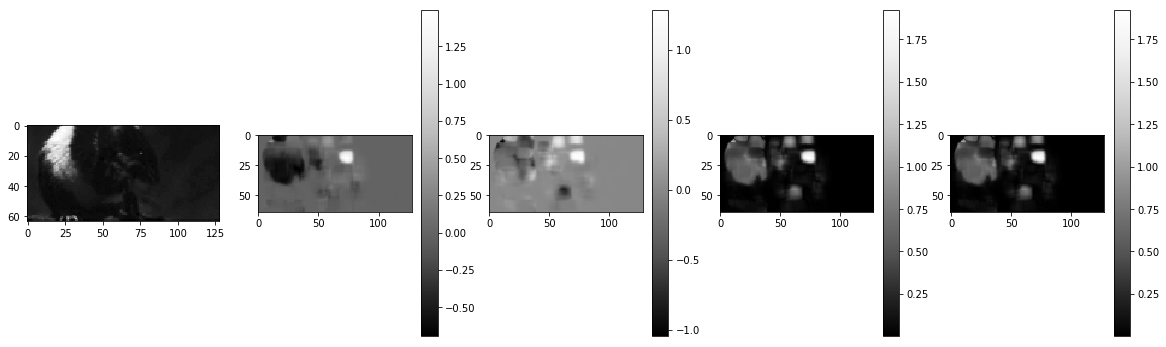

In [6]:
import cv2
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from skimage.measure import block_reduce


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,6)


im1 = np.squeeze(movie_fl[230,123,:,:])
im2 = np.squeeze(movie_fl[230,124,:,:])
# cv2.calcOpticalFlowFarneback(prev, next, pyr_scale, levels, winsize, iterations, poly_n, poly_sigma, flags[, flow]) → flow
flow = cv2.calcOpticalFlowFarneback(im1,im2, None, 0.5, 1, 8, 20, 3, 1.1, 0)
U = np.squeeze(flow[:,:,0])
V = np.squeeze(flow[:,:,1])
UV = (V**2+U**2)**.5


plt.figure()
plt.subplot(1,5,1)
plt.imshow(im2,cmap='Greys_r')
plt.subplot(1,5,2)
plt.imshow(U,cmap='Greys_r')
plt.colorbar()
plt.subplot(1,5,3)
plt.imshow(V,cmap='Greys_r')
plt.colorbar()
plt.subplot(1,5,4)
plt.imshow(UV,cmap='Greys_r')
plt.colorbar()
plt.subplot(1,5,5)
plt.imshow(block_reduce(UV, (1,1), np.max),cmap='Greys_r')
plt.colorbar()

plt.show()

In [97]:
import cv2
import numpy as np
from skimage.measure import block_reduce

fl_out = np.empty((288,150,16,32,2),dtype=np.float32)

for ii in range(movie_fl.shape[0]):
    print('{} '.format(ii),end='')
    for jj in range(movie_fl.shape[1]-1):
        im1 = np.squeeze(movie_fl[ii,jj,:,:])
        im2 = np.squeeze(movie_fl[ii,jj+1,:,:])
        flow = cv2.calcOpticalFlowFarneback(im1,im2, None, 0.5, 1, 8, 20, 3, 1.1, 0)
        U = np.squeeze(flow[:,:,0])
        V = np.squeeze(flow[:,:,1])
# #         UV = (U**2+V**2)**.5
#         UV_maxpool = block_reduce(UV, (4,4), np.max)
#         U_maxpool = block_reduce(U, (4,4), np.max)
#         V_maxpool = block_reduce(V, (4,4), np.max)
#         UV_maxpool = np.stack( (U_maxpool, V_maxpool), 2)
        UV_maxpool = np.stack( (U, V), 2)
        fl_out[ii,jj+1,:,:] = UV_maxpool.astype(np.float32)
    fl_out[ii,0,:,:] = fl_out[ii,1,:,:]

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [98]:
fl_out.shape

(288, 150, 16, 32, 2)

In [99]:
np.save('fl_out.npy', fl_out)


In [87]:
fl_out = np.load('fl_out.npy')
frhist = np.load('frhist.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'fr_hist.npy'

In [101]:

# fl_out_lin = np.reshape(fl_out,(288,150,-1))
# print(mn_out.shape)
# print(fl_out_lin.shape)
# minput = np.concatenate((fl_out_lin,mn_out),2)
# print(minput.shape)

fl_out = np.load('fl_out.npy')
frhist = np.load('frhist.npy')
mn_out = np.load('mn_out.npy')

print(frhist.shape)
print(mn_out.shape)
print(fl_out.shape)
minput = np.concatenate((fl_out,mn_out),4)
print(minput.shape)




(288, 150, 54)
(288, 150, 16, 32, 32)
(288, 150, 16, 32, 2)
(288, 150, 16, 32, 34)


In [139]:
import keras
from keras.layers import LSTM, Activation, Dense, BatchNormalization 
from keras.layers import TimeDistributed, SeparableConv2D, Conv2D, Input, Reshape
from keras import backend as K
from keras.applications.mobilenet import DepthwiseConv2D
import numpy as np


def relu6(x):
    return K.relu(x, max_value=6)

def TDdepthwise_conv_block_TimeDistributed(model, pointwise_conv_filters, alpha,
                          depth_multiplier=1, strides=(1, 1), block_id=1):
    """from keras.applications.mobilenet, with TimeDistributed wrappers
    Adds a depthwise convolution block.
    A depthwise convolution block consists of a depthwise conv,
    batch normalization, relu6, pointwise convolution,
    batch normalization and relu6 activation.
    # Arguments
        inputs: Input tensor of shape `(rows, cols, channels)`
            (with `channels_last` data format) or
            (channels, rows, cols) (with `channels_first` data format).
        pointwise_conv_filters: Integer, the dimensionality of the output space
            (i.e. the number output of filters in the pointwise convolution).
        alpha: controls the width of the network.
            - If `alpha` < 1.0, proportionally decreases the number
                of filters in each layer.
            - If `alpha` > 1.0, proportionally increases the number
                of filters in each layer.
            - If `alpha` = 1, default number of filters from the paper
                 are used at each layer.
        depth_multiplier: The number of depthwise convolution output channels
            for each input channel.
            The total number of depthwise convolution output
            channels will be equal to `filters_in * depth_multiplier`.
        strides: An integer or tuple/list of 2 integers,
            specifying the strides of the convolution along the width and height.
            Can be a single integer to specify the same value for
            all spatial dimensions.
            Specifying any stride value != 1 is incompatible with specifying
            any `dilation_rate` value != 1.
        block_id: Integer, a unique identification designating the block number.
    # Input shape
        4D tensor with shape:
        `(batch, channels, rows, cols)` if data_format='channels_first'
        or 4D tensor with shape:
        `(batch, rows, cols, channels)` if data_format='channels_last'.
    # Output shape
        4D tensor with shape:
        `(batch, filters, new_rows, new_cols)` if data_format='channels_first'
        or 4D tensor with shape:
        `(batch, new_rows, new_cols, filters)` if data_format='channels_last'.
        `rows` and `cols` values might have changed due to stride.
    # Returns
        Output tensor of block.
    """
    channel_axis = 1 if K.image_data_format() == 'channels_first' else -1
    pointwise_conv_filters = int(pointwise_conv_filters * alpha)

    model.add(TimeDistributed(DepthwiseConv2D((3, 3),
                        padding='same',
                        depth_multiplier=depth_multiplier,
                        strides=strides,
                        use_bias=False),
                        name='conv_dw_%d' % block_id))
    model.add(TimeDistributed(BatchNormalization(axis=channel_axis), name='conv_dw_%d_bn' % block_id))
    model.add(TimeDistributed(Activation(relu6), name='conv_dw_%d_relu' % block_id))

    model.add(TimeDistributed(Conv2D(pointwise_conv_filters, (1, 1),
               padding='same',
               use_bias=False,
               strides=(1, 1)),
               name='conv_pw_%d' % block_id))
    model.add(TimeDistributed(BatchNormalization(axis=channel_axis), name='conv_pw_%d_bn' % block_id))
    model.add(TimeDistributed(Activation(relu6), name='conv_pw_%d_relu' % block_id))
    return model


# movie_chunk_length = fl_out.shape[1]
# fl_out_lin_length = fl_out_lin.shape[2]
# movie_length = minput.shape[1]
# movie_ipx = minput.shape[2]

nHidden = 54
nLSTM = 2
nDense = 2
nSCNeu = frhist.shape[2]

alpha = 1
depth_multiplier = 1
channel_axis = 1 if K.image_data_format() == 'channels_first' else -1

model = keras.models.Sequential()

# model.add(TimeDistributed(SeparableConv2D(32, (3,3), padding='same' ), input_shape=(minput.shape[1],minput.shape[2],minput.shape[3],minput.shape[4])  ))
# model.add(TimeDistributed(BatchNormalization()))
# model.add(TimeDistributed(Activation('relu')))

# x = TimeDistributed(Conv2D(32, (3,3), padding='same' ) )
# x = TimeDistributed(BatchNormalization())(x)
# x = TimeDistributed(Activation('relu'))(x)

# model.add(TimeDistributed(DepthwiseConv2D((3, 3),
#                         padding='same',
#                         depth_multiplier=depth_multiplier,
#                         strides=(1,1),
#                         use_bias=False,
#                         name='conv_dw_%d' % 0)), 
#                         input_shape=(minput.shape[1],minput.shape[2],minput.shape[3],minput.shape[4]))
# model.add(BatchNormalization(axis=channel_axis, name='conv_dw_%d_bn' % 0))

model.add(TimeDistributed(Conv2D(32, (3,3), padding='same' ), input_shape=(minput.shape[1],minput.shape[2],minput.shape[3],minput.shape[4])  ))

# x = _depthwise_conv_block(x, 32, alpha, depth_multiplier, block_id=0)
_depthwise_conv_block_TimeDistributed(model, 32, alpha, depth_multiplier, strides=(2, 2), block_id=1)
_depthwise_conv_block_TimeDistributed(model, 64, alpha, depth_multiplier, block_id=2)

_depthwise_conv_block_TimeDistributed(model, 128, alpha, depth_multiplier,
                          strides=(2, 2), block_id=3)
_depthwise_conv_block_TimeDistributed(model, 128, alpha, depth_multiplier, block_id=4)

_depthwise_conv_block_TimeDistributed(model, 256, alpha, depth_multiplier,
                          strides=(2, 2), block_id=5)
_depthwise_conv_block_TimeDistributed(model, 256, alpha, depth_multiplier, block_id=6)
_depthwise_conv_block_TimeDistributed(model, 512, alpha, depth_multiplier, strides=(2, 2), block_id=6)

model.add(Reshape((150,-1)))
model.add(LSTM(100, return_sequences=True))
model.add(BatchNormalization(momentum=0))
model.add(Activation('relu'))
model.add(TimeDistributed(Dense(54)))
model.add(Activation('softplus'))

# pointwise_conv_filters = 512
# model.add(TimeDistributed(DepthwiseConv2D((3, 3),
#                     padding='same',
#                     depth_multiplier=depth_multiplier,
#                     strides=(2,2),
#                     use_bias=False,
#                     name='conv_dw_%d' % 7)))
# model.add(TimeDistributed(BatchNormalization(axis=channel_axis, name='conv_dw_%d_bn' % 7)))
# model.add(TimeDistributed(Activation(relu6, name='conv_dw_%d_relu' % 7)))

# for _ in range(nLSTM-1):
#     model.add(BatchNormalization(momentum=0))
#     model.add(Activation('relu'))
#     model.add(LSTM(nHidden, return_sequences=True))


# for _ in range(nDense-1):    
#     model.add(BatchNormalization(momentum=0))
#     model.add(Activation('linear'))
#     model.add(TimeDistributed(Dense(nSCNeu)))
#     model.add(Activation('softplus'))

# input_shape=(minput.shape[1],minput.shape[2],minput.shape[3],minput.shape[4])
# inputs0 = Input(shape=(minput.shape[1],minput.shape[2],minput.shape[3],minput.shape[4]))
# model = Model(inputs0, x, name='superPoopyFace')

adamopt = keras.optimizers.Adam(lr = 0.001, decay = 1e-7)
# Please make sure to use Poisson likelihood function for the loss function
model.compile(optimizer=adamopt, loss='poisson')
model.summary()

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(minput, frhist, epochs=100, batch_size=32, validation_split=0.2, shuffle=True, callbacks=[early_stopping])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_465 (TimeDi (None, 150, 16, 32, 32)   9824      
_________________________________________________________________
time_distributed_466 (TimeDi (None, 150, 8, 16, 32)    288       
_________________________________________________________________
time_distributed_467 (TimeDi (None, 150, 8, 16, 32)    128       
_________________________________________________________________
time_distributed_468 (TimeDi (None, 150, 8, 16, 32)    0         
_________________________________________________________________
time_distributed_469 (TimeDi (None, 150, 8, 16, 32)    1024      
_________________________________________________________________
time_distributed_470 (TimeDi (None, 150, 8, 16, 32)    128       
_________________________________________________________________
time_distributed_471 (TimeDi (None, 150, 8, 16, 32)    0         
__________

Epoch 14/100
230/230 [==============================] - 86s 375ms/step - loss: 0.3333 - val_loss: 0.3692
Epoch 15/100
230/230 [==============================] - 86s 375ms/step - loss: 0.3322 - val_loss: 0.3718
Epoch 16/100
230/230 [==============================] - 86s 375ms/step - loss: 0.3310 - val_loss: 0.3584
Epoch 17/100
230/230 [==============================] - 86s 375ms/step - loss: 0.3295 - val_loss: 0.3648
Epoch 18/100
230/230 [==============================] - 87s 378ms/step - loss: 0.3282 - val_loss: 0.3601
Epoch 19/100
230/230 [==============================] - 86s 375ms/step - loss: 0.3269 - val_loss: 0.3591
Epoch 20/100
230/230 [==============================] - 86s 376ms/step - loss: 0.3254 - val_loss: 0.3571
Epoch 21/100
230/230 [==============================] - 86s 375ms/step - loss: 0.3251 - val_loss: 0.3594
Epoch 22/100
230/230 [==============================] - 86s 376ms/step - loss: 0.3234 - val_loss: 0.3538
Epoch 23/100
230/230 [==============================] -

In [ ]:
# structure for mobilenet

#     x = _conv_block(img_input, 32, alpha, strides=(2, 2))
#     x = _depthwise_conv_block(x, 64, alpha, depth_multiplier, block_id=1)

#     x = _depthwise_conv_block(x, 128, alpha, depth_multiplier,
#                               strides=(2, 2), block_id=2)
#     x = _depthwise_conv_block(x, 128, alpha, depth_multiplier, block_id=3)

#     x = _depthwise_conv_block(x, 256, alpha, depth_multiplier,
#                               strides=(2, 2), block_id=4)
#     x = _depthwise_conv_block(x, 256, alpha, depth_multiplier, block_id=5)

#     x = _depthwise_conv_block(x, 512, alpha, depth_multiplier,
#                               strides=(2, 2), block_id=6)
#     x = _depthwise_conv_block(x, 512, alpha, depth_multiplier, block_id=7)
#     x = _depthwise_conv_block(x, 512, alpha, depth_multiplier, block_id=8)
#     x = _depthwise_conv_block(x, 512, alpha, depth_multiplier, block_id=9)
#     x = _depthwise_conv_block(x, 512, alpha, depth_multiplier, block_id=10)
#     x = _depthwise_conv_block(x, 512, alpha, depth_multiplier, block_id=11)

#     x = _depthwise_conv_block(x, 1024, alpha, depth_multiplier,
#                               strides=(2, 2), block_id=12)
#     x = _depthwise_conv_block(x, 1024, alpha, depth_multiplier, block_id=13)

In [60]:
import keras
from keras.layers import LSTM, Activation, Dense, BatchNormalization, TimeDistributed
import numpy as np

# It makes a 3-layer LSTM network with batch normalization on each layer.
# No dropout, regularization, convolution structures are used.
# As you see in the summary, most parameters go to the first weight matrix.


# movie_chunk_length = fl_out.shape[1]
# fl_out_lin_length = fl_out_lin.shape[2]
movie_chunk_length = minput.shape[1]
minput_length = minput.shape[2]
nHidden = 100
nLSTM = 2
nDense = 2
nSCNeu = frhist.shape[2]


model = keras.models.Sequential()
model.add(LSTM(nHidden, input_shape=(movie_chunk_length, minput_length), return_sequences=True, implementation=2))

for _ in range(nLSTM-1):
    model.add(BatchNormalization(momentum=0))
    model.add(Activation('relu'))
    model.add(LSTM(nHidden, return_sequences=True))


for _ in range(nDense-1):    
    model.add(BatchNormalization(momentum=0))
    model.add(Activation('linear'))
    model.add(TimeDistributed(Dense(nSCNeu)))
    model.add(Activation('softplus'))
    
adamopt = keras.optimizers.Adam(lr = 0.001, decay = 1e-7)

# Please make sure to use Poisson likelihood function for the loss function
model.compile(optimizer=adamopt, loss='poisson')
model.summary()

# early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# history = model.fit(minput, frhist, epochs=100, batch_size=32, validation_split=0.2, shuffle=True, callbacks=[early_stopping])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 150, 100)          7003600   
_________________________________________________________________
batch_normalization_11 (Batc (None, 150, 100)          400       
_________________________________________________________________
activation_16 (Activation)   (None, 150, 100)          0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 150, 100)          80400     
_________________________________________________________________
batch_normalization_12 (Batc (None, 150, 100)          400       
_________________________________________________________________
activation_17 (Activation)   (None, 150, 100)          0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 150, 54)           5454      
__________

In [31]:
%whos

Variable             Type        Data/Info
------------------------------------------
Activation           type        <class 'keras.layers.core.Activation'>
BatchNormalization   type        <class 'keras.layers.norm<...>tion.BatchNormalization'>
Dense                type        <class 'keras.layers.core.Dense'>
LSTM                 type        <class 'keras.layers.recurrent.LSTM'>
U                    ndarray     64x128: 8192 elems, type `float32`, 32768 bytes
UV                   ndarray     64x128: 8192 elems, type `float32`, 32768 bytes
UV_maxpool           ndarray     16x32: 512 elems, type `float32`, 2048 bytes
V                    ndarray     64x128: 8192 elems, type `float32`, 32768 bytes
a                    list        n=0
block_reduce         function    <function block_reduce at 0x112f110d0>
cv2                  module      <module 'cv2' from '/User<...>.6/site-packages/cv2.so'>
datafile             File        <HDF5 file "SCNeuronModel<...>mpetition.mat" (mode r+)>
fl_out 

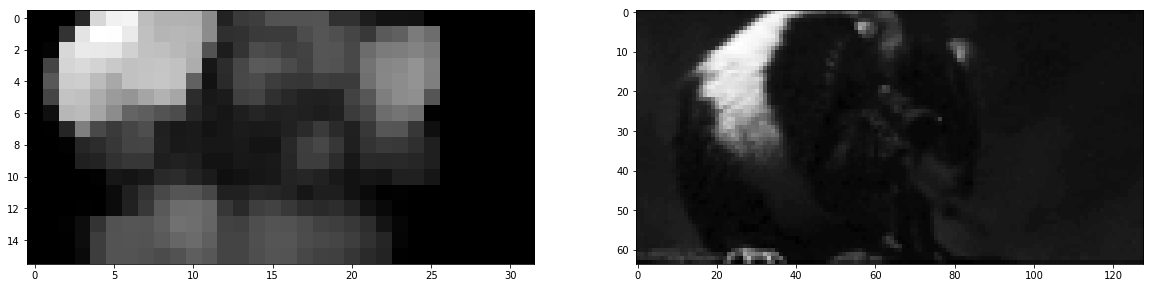

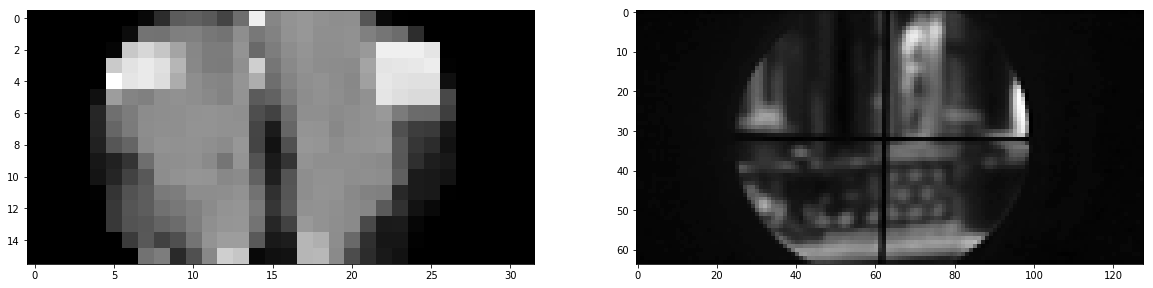

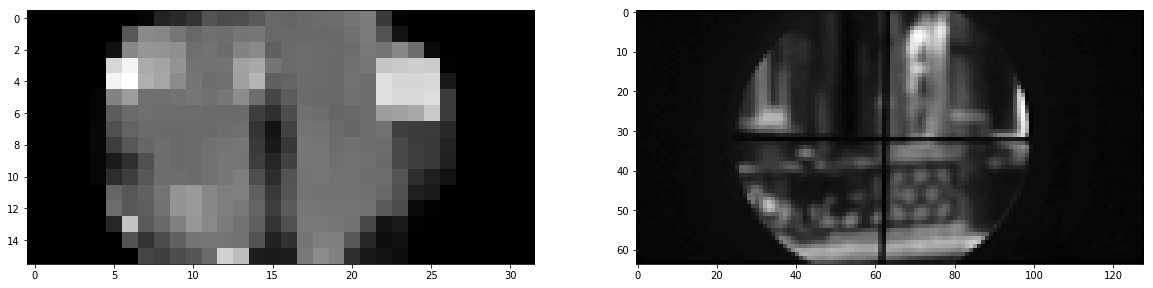

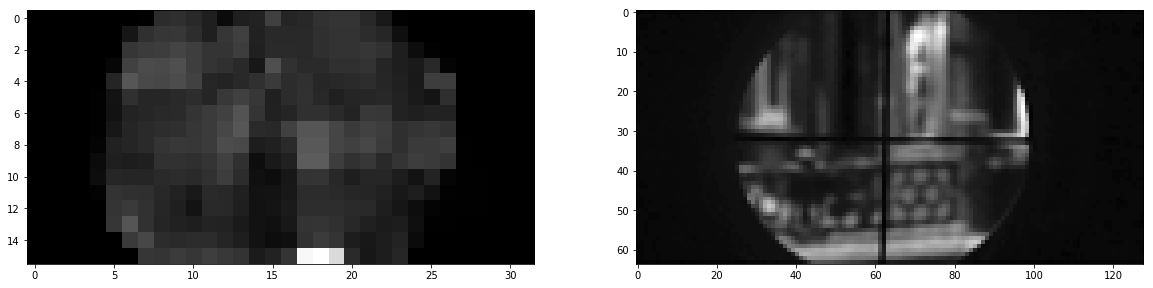

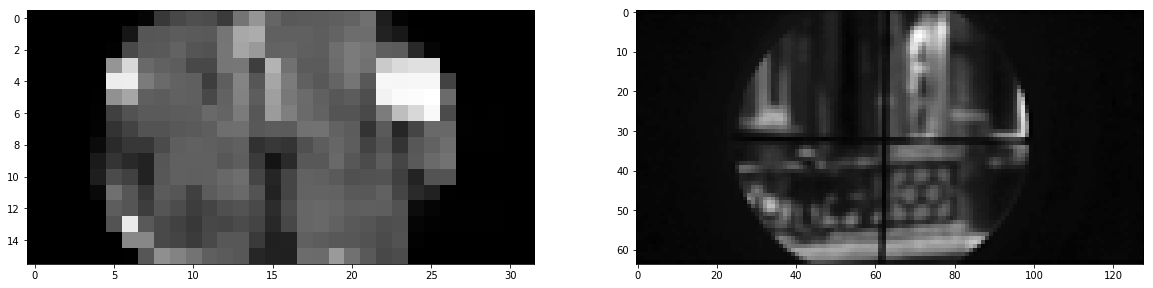

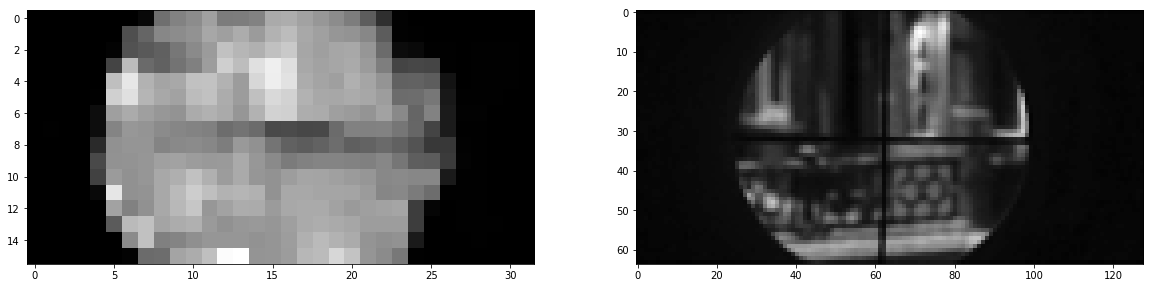

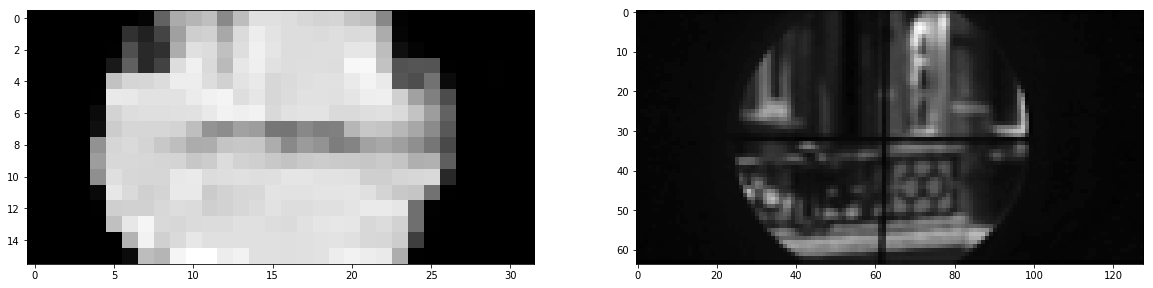

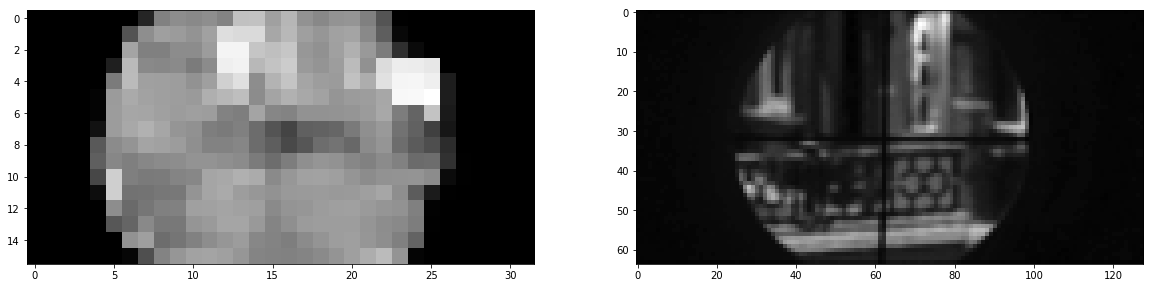

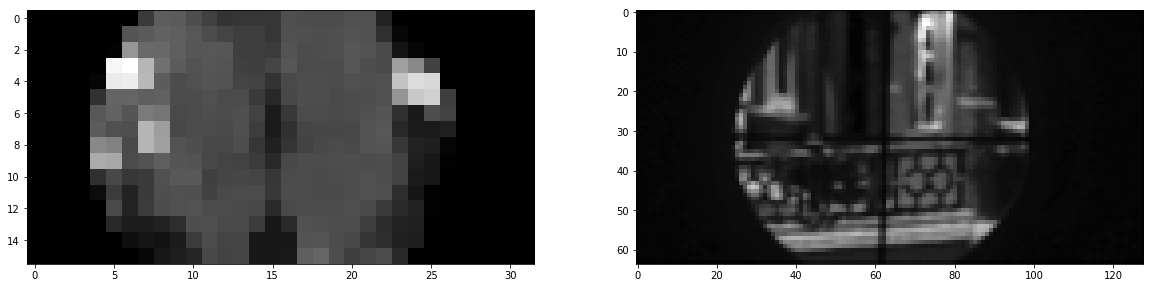

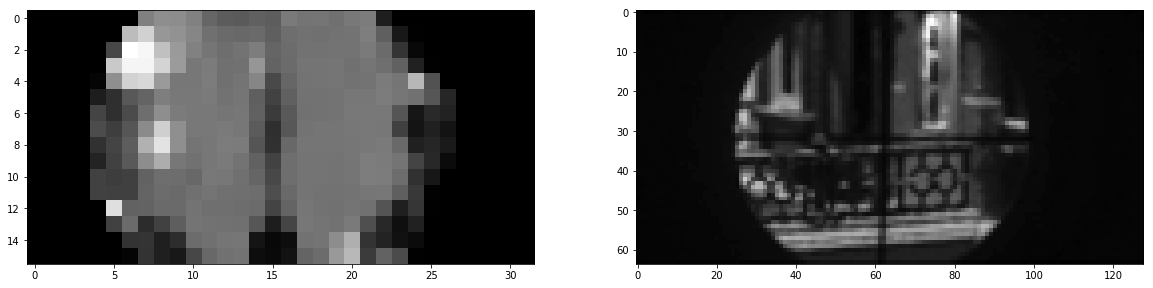

In [15]:
import matplotlib.pyplot as plt
import matplotlib

for ii in range(0,20,2):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(fl_out[230,0+ii,:,:],cmap='Greys_r')
    plt.subplot(1,2,2)
    plt.imshow(movie_fl[230,0+ii,:,:],cmap='Greys_r')

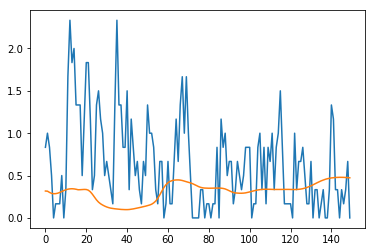

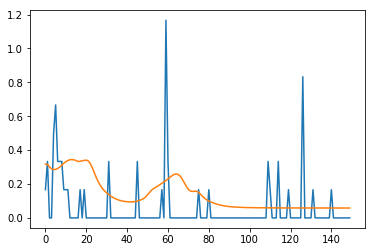

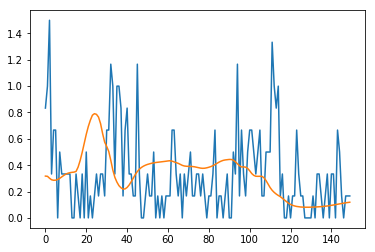

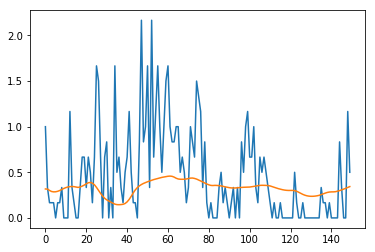

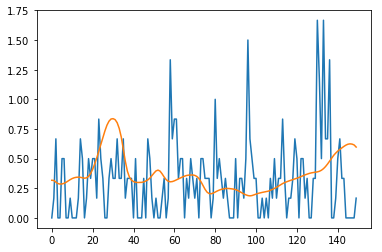

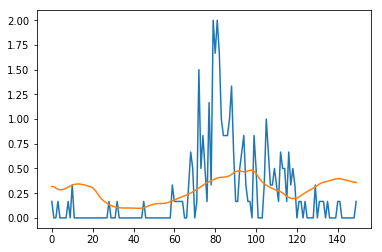

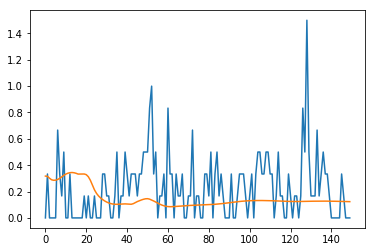

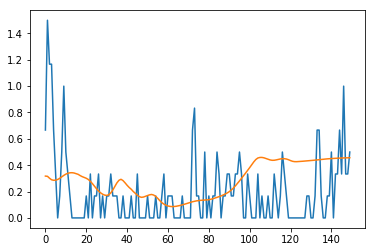

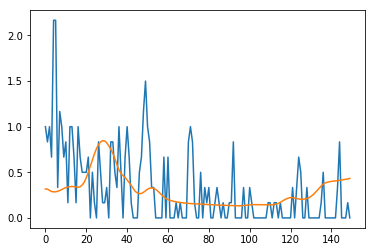

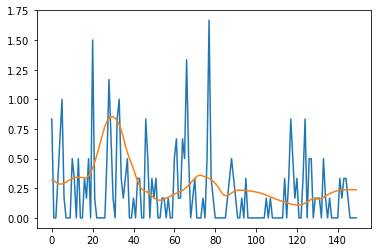

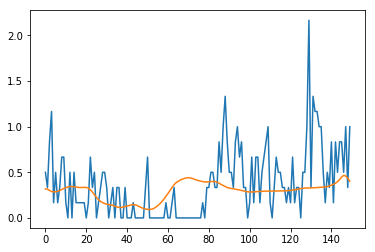

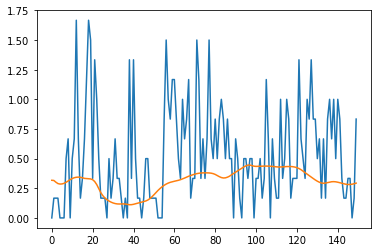

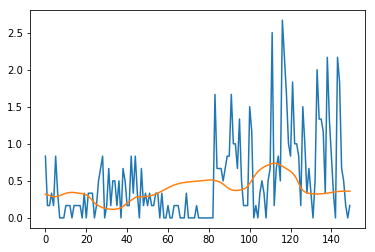

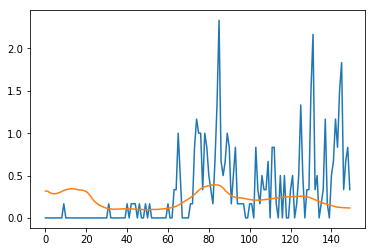

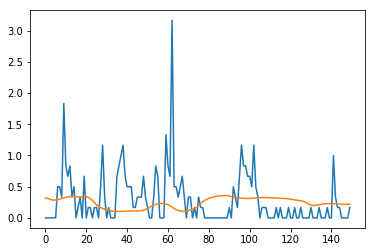

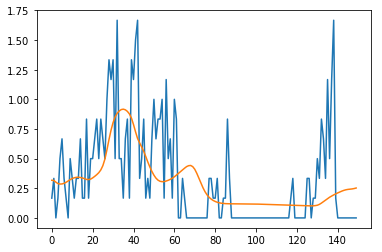

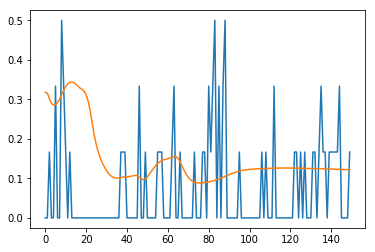

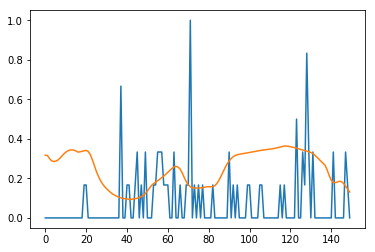

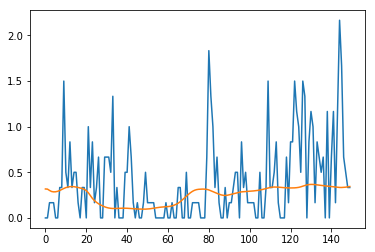

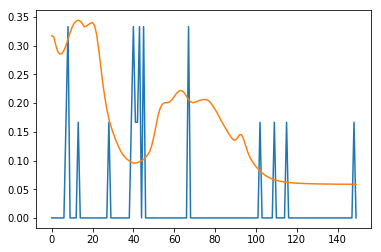

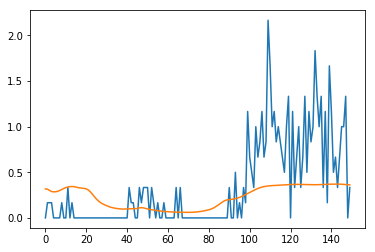

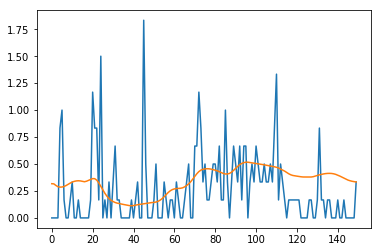

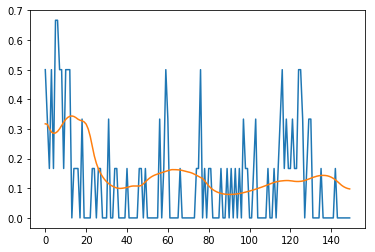

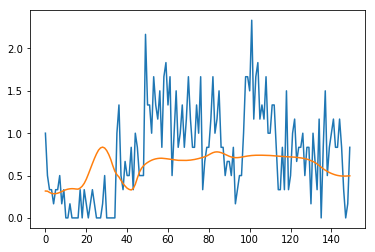

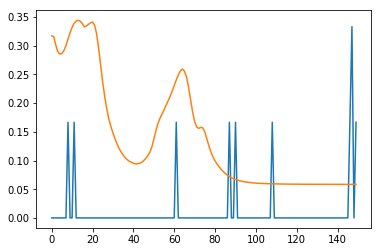

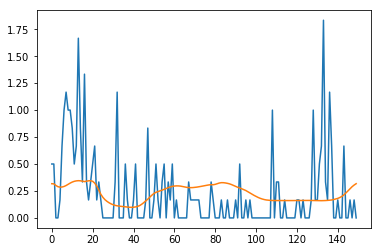

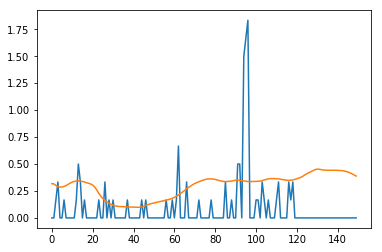

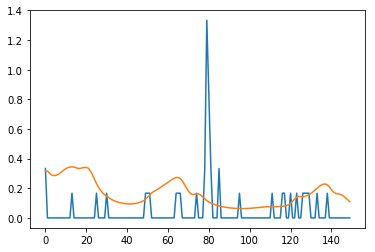

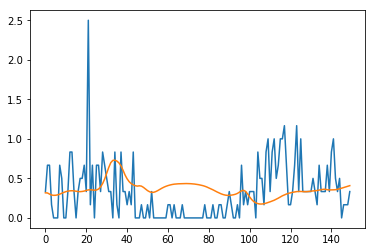

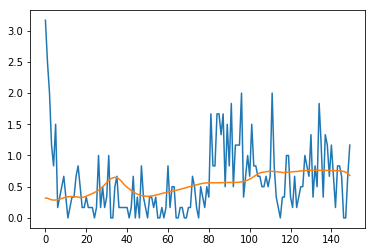

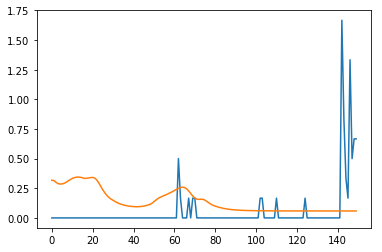

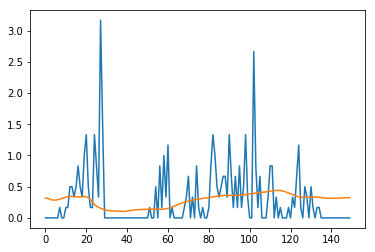

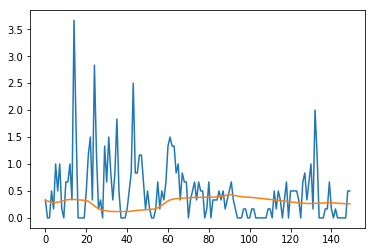

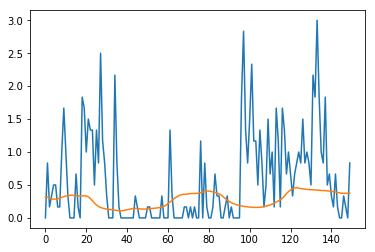

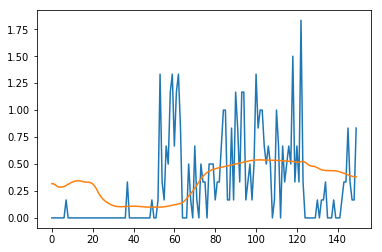

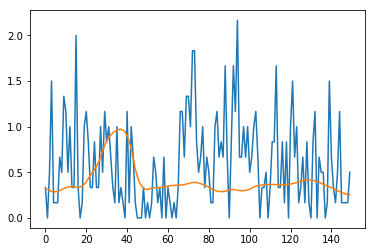

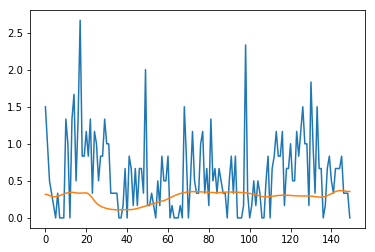

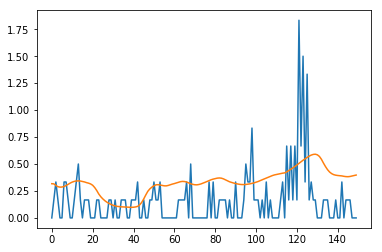

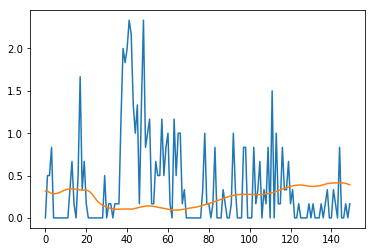

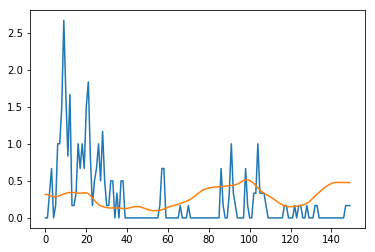

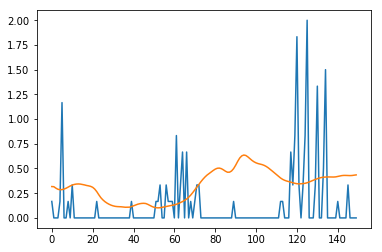

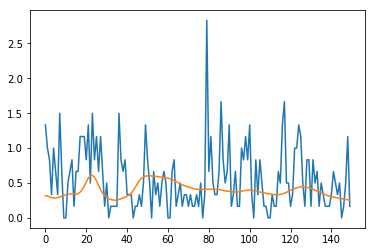

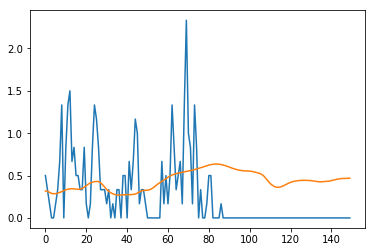

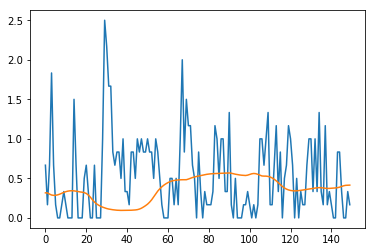

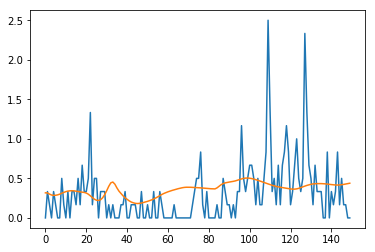

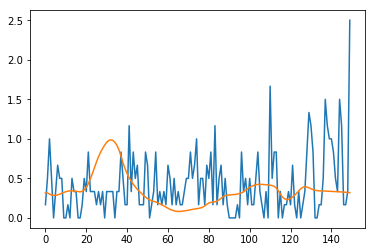

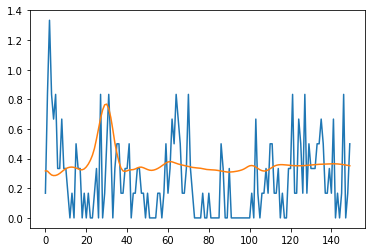

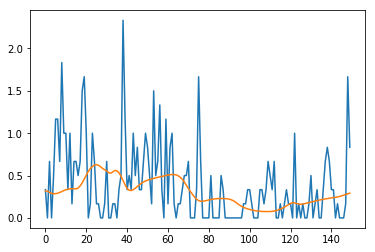

In [55]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# 
# output = model.predict(fl_out_lin)

for m in range(0, 48):
    n=31
    # plot the average of 6 trials of the same movie
    plt.plot(np.mean(frhist[(m*6):(m+1)*6, :, n], axis=(0)))

    
    # plot the output of the network
    # plt.plot(output[m*6,:,n])
    plt.plot(np.mean(output[(m*6):(m+1)*6, :, n], axis=(0)))
    plt.show()
    # last 10 movies should be the validation dataset

In [74]:
fl_out.shape



(288, 150, 16, 32)

In [91]:
frhist = datafile.get('FRhist_tr') # firing rate histograms


